In [19]:
import plotnine as p9
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [336]:
x = np.array([1,2,2,3,4,4,4,4,5,6,7,8])
n = x.shape[0]

In [21]:
q = np.array([np.sum(x <= x_i) for x_i in x])
q = q / n
q

array([0.09090909, 0.27272727, 0.27272727, 0.36363636, 0.63636364,
       0.63636364, 0.63636364, 0.72727273, 0.81818182, 0.90909091,
       1.        ])

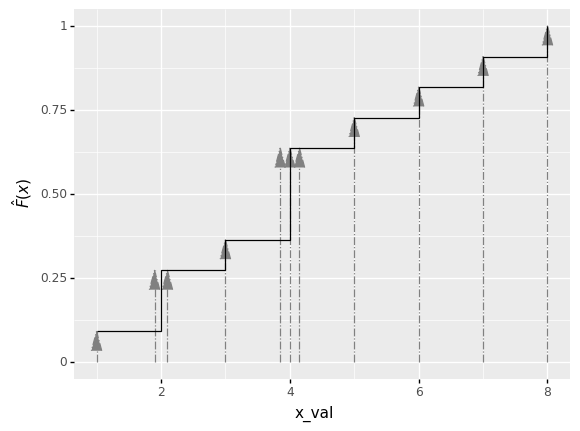

In [137]:
def plot_qt(x, q):
    df = pd.DataFrame({"x_val": x, "q": q})
    p = p9.ggplot(df) + p9.ylab(r"$\hat F(x)$")
    
    df_quiver = pd.DataFrame({"x_val": x.astype("float"), "y_begin": 0, "y_end": q})
    
    x_unique, x_count = np.unique(x, return_counts=True)
    for x_i, count_i in zip(x_unique[x_count > 1], x_count[x_count > 1]):
        print()
        df_quiver.loc[df_quiver["x_val"] == x_i, "x_val"] += np.linspace(-0.05 * count_i, 0.05 * count_i, count_i) 
    df_quiver_long = pd.wide_to_long(df_quiver, ["y"], i="x_val", j="Arrow_part", sep='_', suffix="(begin|end)").reset_index()
    p += p9.geom_line(data=df_quiver_long, mapping=p9.aes(x="x_val", y="y", group="x_val"),
                      color="grey", linetype="-.", 
                      arrow=p9.arrow(angle=15, type="closed"))
    p += p9.geom_step(mapping=p9.aes(x = "x_val", y = "q"))
    p.draw()
plot_qt(x, q)

In [124]:
df_quiver.loc[df_quiver["x_val"] == 2.057763]

,x_val,y_begin,y_end


In [69]:
df_quiver = pd.DataFrame({"x_val": x + np.random.uniform(-0.1, 0.1, size=x.shape[0]), "y_begin": 0, "y_end": q})
df_quiver_long = pd.wide_to_long(df_quiver, ["y"], i="x_val", j="Arrow_part", sep='_', suffix="(begin|end)").reset_index()
df_quiver_long

,x_val,Arrow_part,y
0,0.990003,begin,0.000000
1,2.057763,begin,0.000000
2,1.917055,begin,0.000000
3,3.025090,begin,0.000000
4,4.081067,begin,0.000000
5,4.013569,begin,0.000000
6,4.055853,begin,0.000000
7,4.997705,begin,0.000000
8,6.075338,begin,0.000000
9,7.051365,begin,0.000000
